# Boston Housing Prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 14)

## Categorical Data

In [4]:
categorical_features = ["CHAS"]

## Checking for missing values

In [5]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Checking for outliers

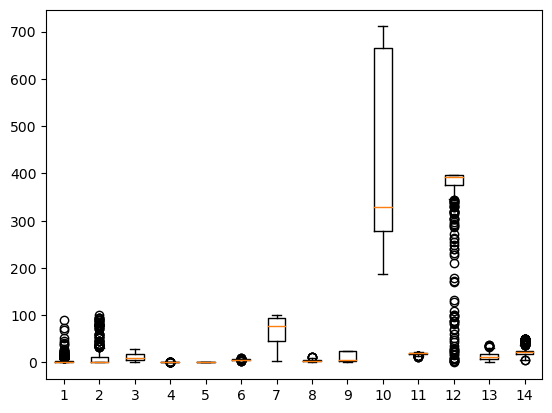

In [6]:
# boxplot can help us to identify outliers
# values below or above the boxplot tails are outliers (circles)

plt.boxplot(df)
plt.show()

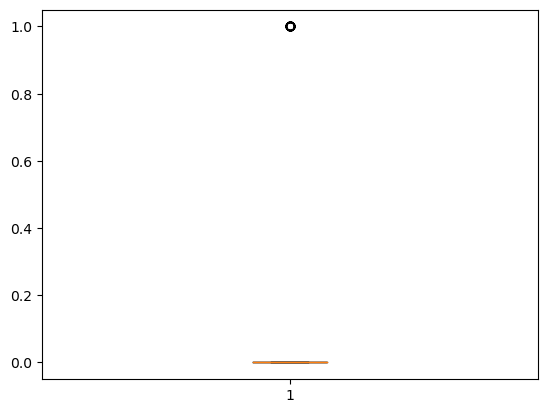

In [7]:
plt.boxplot(df[["CHAS"]])
plt.show()

In [8]:
df[["CHAS"]].describe()

,CHAS
count,506.000000
mean,0.069170
std,0.253994
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
df[df["CHAS"] == 1].count()

CRIM       35
ZN         35
INDUS      35
CHAS       35
NOX        35
RM         35
AGE        35
DIS        35
RAD        35
TAX        35
PTRATIO    35
B          35
LSTAT      35
MEDV       35
dtype: int64

## Removing Outliers

In [10]:
# This is the IQR method applied on all columns to remove the outliers.

# IQR = Q3 - Q1
# lower_bound = Q1 - (1.5 * IQR)
# upper_bound = Q3 + (1.5 * IQR)

# anything above upper_bound and below lower_bound are outliers

for col in df.columns:
    print(col)
    if col not in categorical_features:
        df_col = df[[col]]
        q1 = np.quantile(df_col, 0.25)
        q3 = np.quantile(df_col, 0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        print(f"Lower Bound: {lower_bound}")
        print(f"Q1: {q1}")
        print(f"Q3: {q3}")
        print(f"Upper Bound: {upper_bound}")
        
        # removing the outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        print("------------------")

CRIM
Lower Bound: -5.31051125
Q1: 0.08204499999999999
Q3: 3.6770825
Upper Bound: 9.06963875
------------------
ZN
Lower Bound: -30.0
Q1: 0.0
Q3: 20.0
Upper Bound: 50.0
------------------
INDUS
Lower Bound: -12.500000000000004
Q1: 5.86
Q3: 18.1
Upper Bound: 36.46000000000001
------------------
CHAS
NOX
Lower Bound: 0.25250000000000006
Q1: 0.464
Q3: 0.605
Upper Bound: 0.8164999999999999
------------------
RM
Lower Bound: 4.919500000000001
Q1: 5.9275
Q3: 6.5995
Upper Bound: 7.6075
------------------
AGE
Lower Bound: -19.89999999999999
Q1: 46.7
Q3: 91.1
Upper Bound: 157.7
------------------
DIS
Lower Bound: -1.3859000000000008
Q1: 2.4259
Q3: 4.9671
Upper Bound: 8.7789
------------------
RAD
Lower Bound: -0.5
Q1: 4.0
Q3: 7.0
Upper Bound: 11.5
------------------
TAX
Lower Bound: 99.0
Q1: 270.0
Q3: 384.0
Upper Bound: 555.0
------------------
PTRATIO
Lower Bound: 12.849999999999994
Q1: 16.9
Q3: 19.6
Upper Bound: 23.650000000000006
------------------
B
Lower Bound: 368.9750000000001
Q1: 385.73


In [11]:
df.shape

(231, 14)

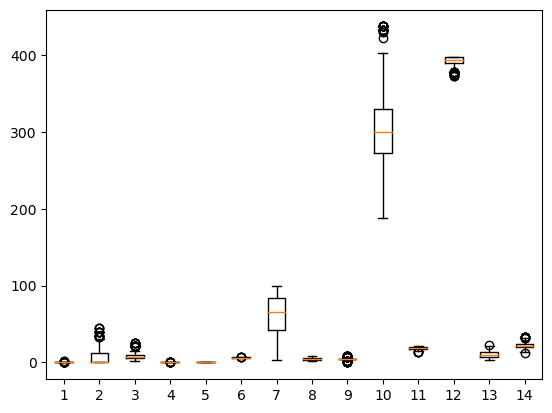

In [12]:
# getting the boxplot after removing the outliers
# since the outliers are removed, mean and std are changed, so there might be new outliers
# even though we might have new outliers, but it should be significantly less than before

plt.boxplot(df)
plt.show()

## Saving Processed Dataset

In [13]:
df.to_csv("../data/housing-clean.csv", index=False)